In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


In [ ]:
data = pd.read_csv(r"/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
data["TotalCharges"].fillna(data["TotalCharges"].median() , inplace =True)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# ** Handling Categorical Values**

**label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
data["gender"] = le.fit_transform(data["gender"])
data["Partner"] = le.fit_transform(data["Partner"])
data["Dependents"] = le.fit_transform(data["Dependents"])
data["PhoneService"] = le.fit_transform(data["PhoneService"])
data["MultipleLines"] = le.fit_transform(data["MultipleLines"])
data["InternetService"] = le.fit_transform(data["InternetService"])
data["OnlineSecurity"] = le.fit_transform(data["OnlineSecurity"])
data["OnlineBackup"] = le.fit_transform(data["OnlineBackup"])
data["DeviceProtection"] = le.fit_transform(data["DeviceProtection"])
data["TechSupport"] = le.fit_transform(data["TechSupport"])
data["StreamingTV"] = le.fit_transform(data["StreamingTV"])
data["StreamingMovies"] = le.fit_transform(data["StreamingMovies"])
data["Contract"] = le.fit_transform(data["Contract"])
data["PaperlessBilling"] = le.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"] = le.fit_transform(data["PaymentMethod"])
data["Churn"] = le.fit_transform(data["Churn"])


**Data after label encoding**


In [ ]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


**Splitting the Dataset into Dependent and Independent variabl**e

In [ ]:
x= data.iloc[:,1:20].values
y= data.iloc[:,20:21].values


**After splitting X & Y**

In [ ]:
x[1]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4000e+01,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 3.0000e+00, 5.6950e+01, 1.8895e+03])

In [ ]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

**OneHot Encoding**

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x[:,6:7]).toarray()
b= one.fit_transform(x[:,7:8]).toarray()
c= one.fit_transform(x[:,8:9]).toarray()
d= one.fit_transform(x[:,9:10]).toarray()
e= one.fit_transform(x[:,10:11]).toarray()
f= one.fit_transform(x[:,11:12]).toarray()
g= one.fit_transform(x[:,12:13]).toarray()
h= one.fit_transform(x[:,13:14]).toarray()
i= one.fit_transform(x[:,14:15]).toarray()
j= one.fit_transform(x[:,16:17]).toarray()
x=np.delete(x,[1,6,7,8,9,10,11,12,13,14,16],axis=1)





In [ ]:
x[1]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 3.4000e+01, 1.0000e+00,
       0.0000e+00, 5.6950e+01, 1.8895e+03])

In [ ]:
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x),axis=1)

**Handling Imbalance Data**

In [ ]:
from imblearn.over_sampling import SMOTE



In [ ]:
smt=SMOTE()

In [ ]:
x_resample, y_resample = smt.fit_resample(x, y)

In [ ]:
x_resample

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 2.98500000e+01, 2.98500000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.69500000e+01, 1.88950000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 5.38500000e+01, 1.08150000e+02],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 7.39505501e+01, 4.98850325e+02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 4.85949785e+01, 4.85949785e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 7.86627507e+01, 1.56762700e+03]])

In [ ]:
y_resample

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
x.shape, x_resample.shape

((7043, 39), (10348, 39))

In [ ]:
y.shape, y_resample.shape

((7043, 1), (10348,))

**Exploratory Data Analysis**

 **Descriptive statistical**

In [ ]:
data.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


** Visual analysis**

**Univariate analysis**

<ipython-input-96-1b9cfbe2c16a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tenure"])
<ipython-input-96-1b9cfbe2c16a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MonthlyCharges"])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

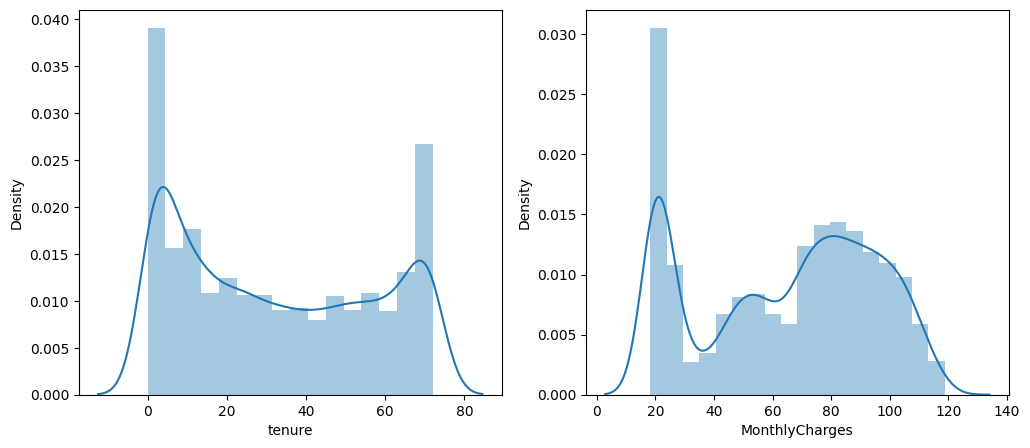

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(data["tenure"])
plt.subplot(1,2,2)
sns.distplot(data["MonthlyCharges"])






**Countplot :**

<Axes: xlabel='Dependents', ylabel='count'>

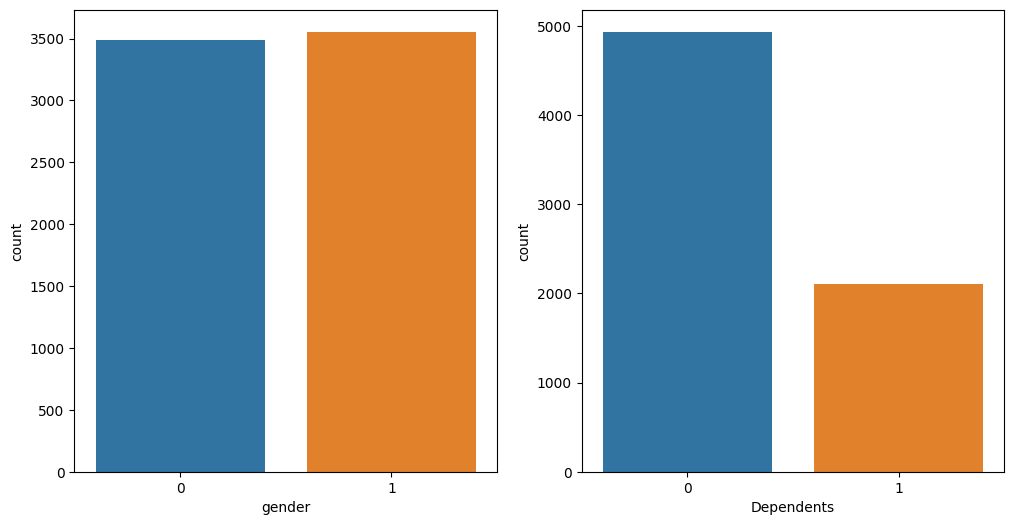

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x=data["gender"])
plt.subplot(1,2,2)
sns.countplot(x=data["Dependents"])



** Bivariate analysis**

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

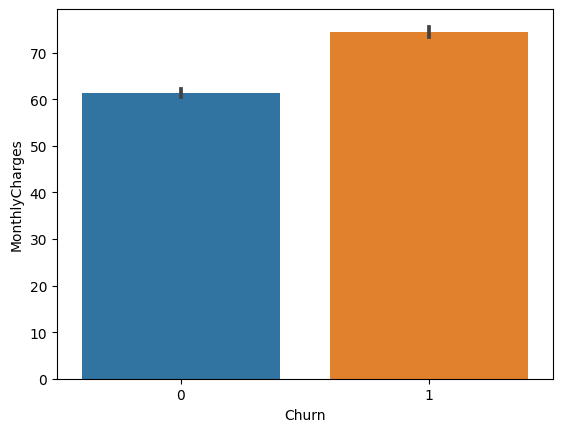

In [ ]:
sns.barplot(x="Churn", y="MonthlyCharges",data=data)

**Multivariate analysis**

<ipython-input-99-f598f8f65083>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

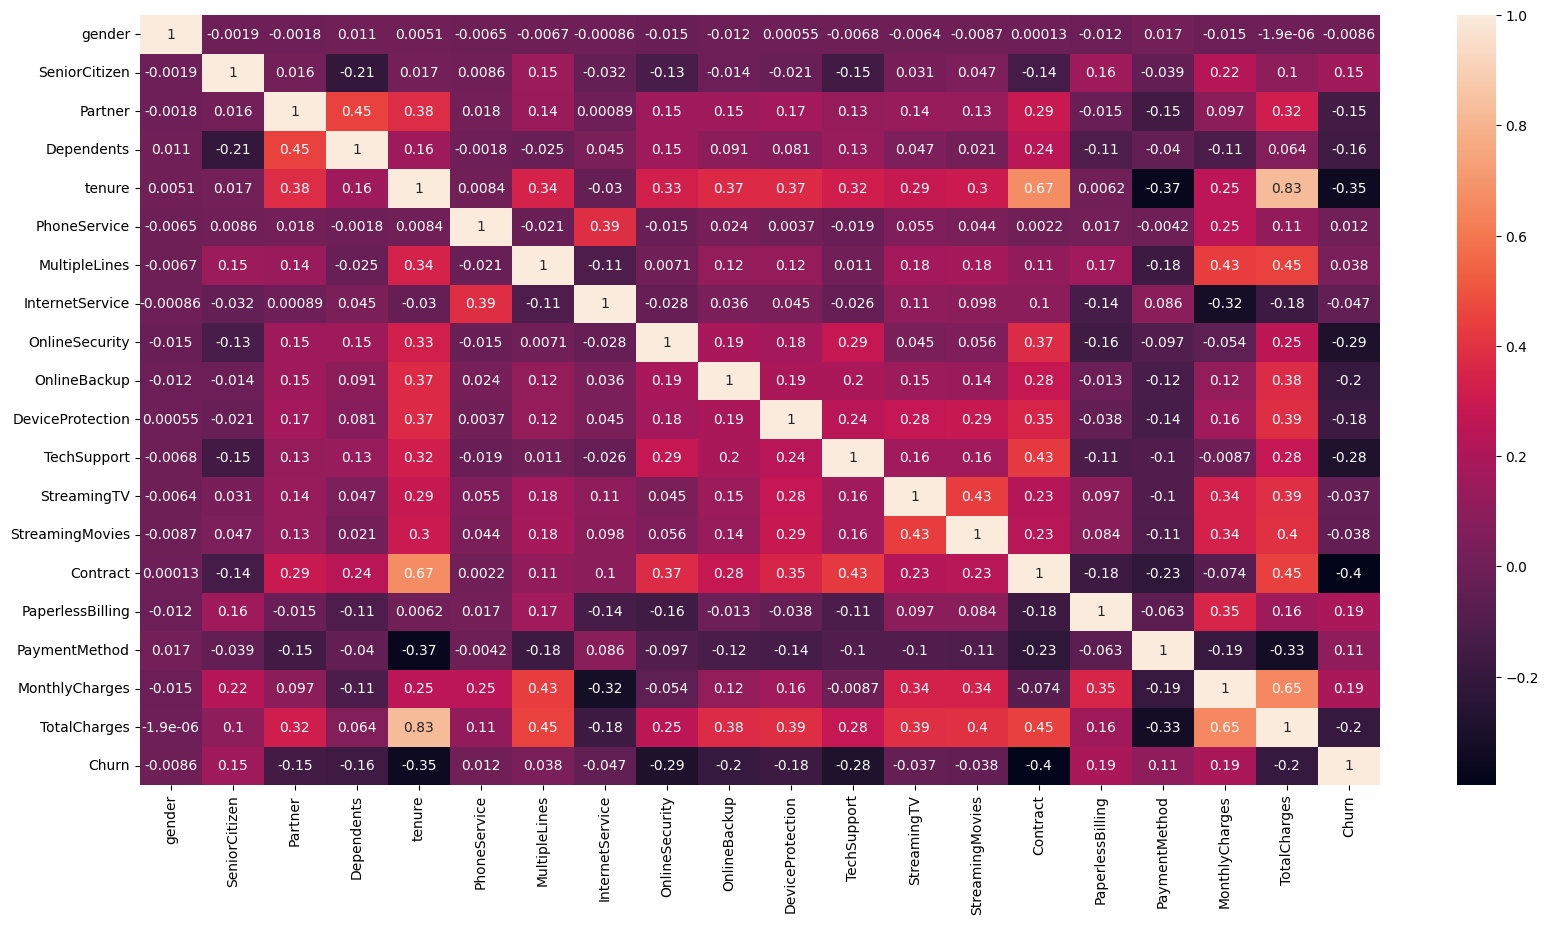

In [ ]:
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(), annot=True)



/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has bee

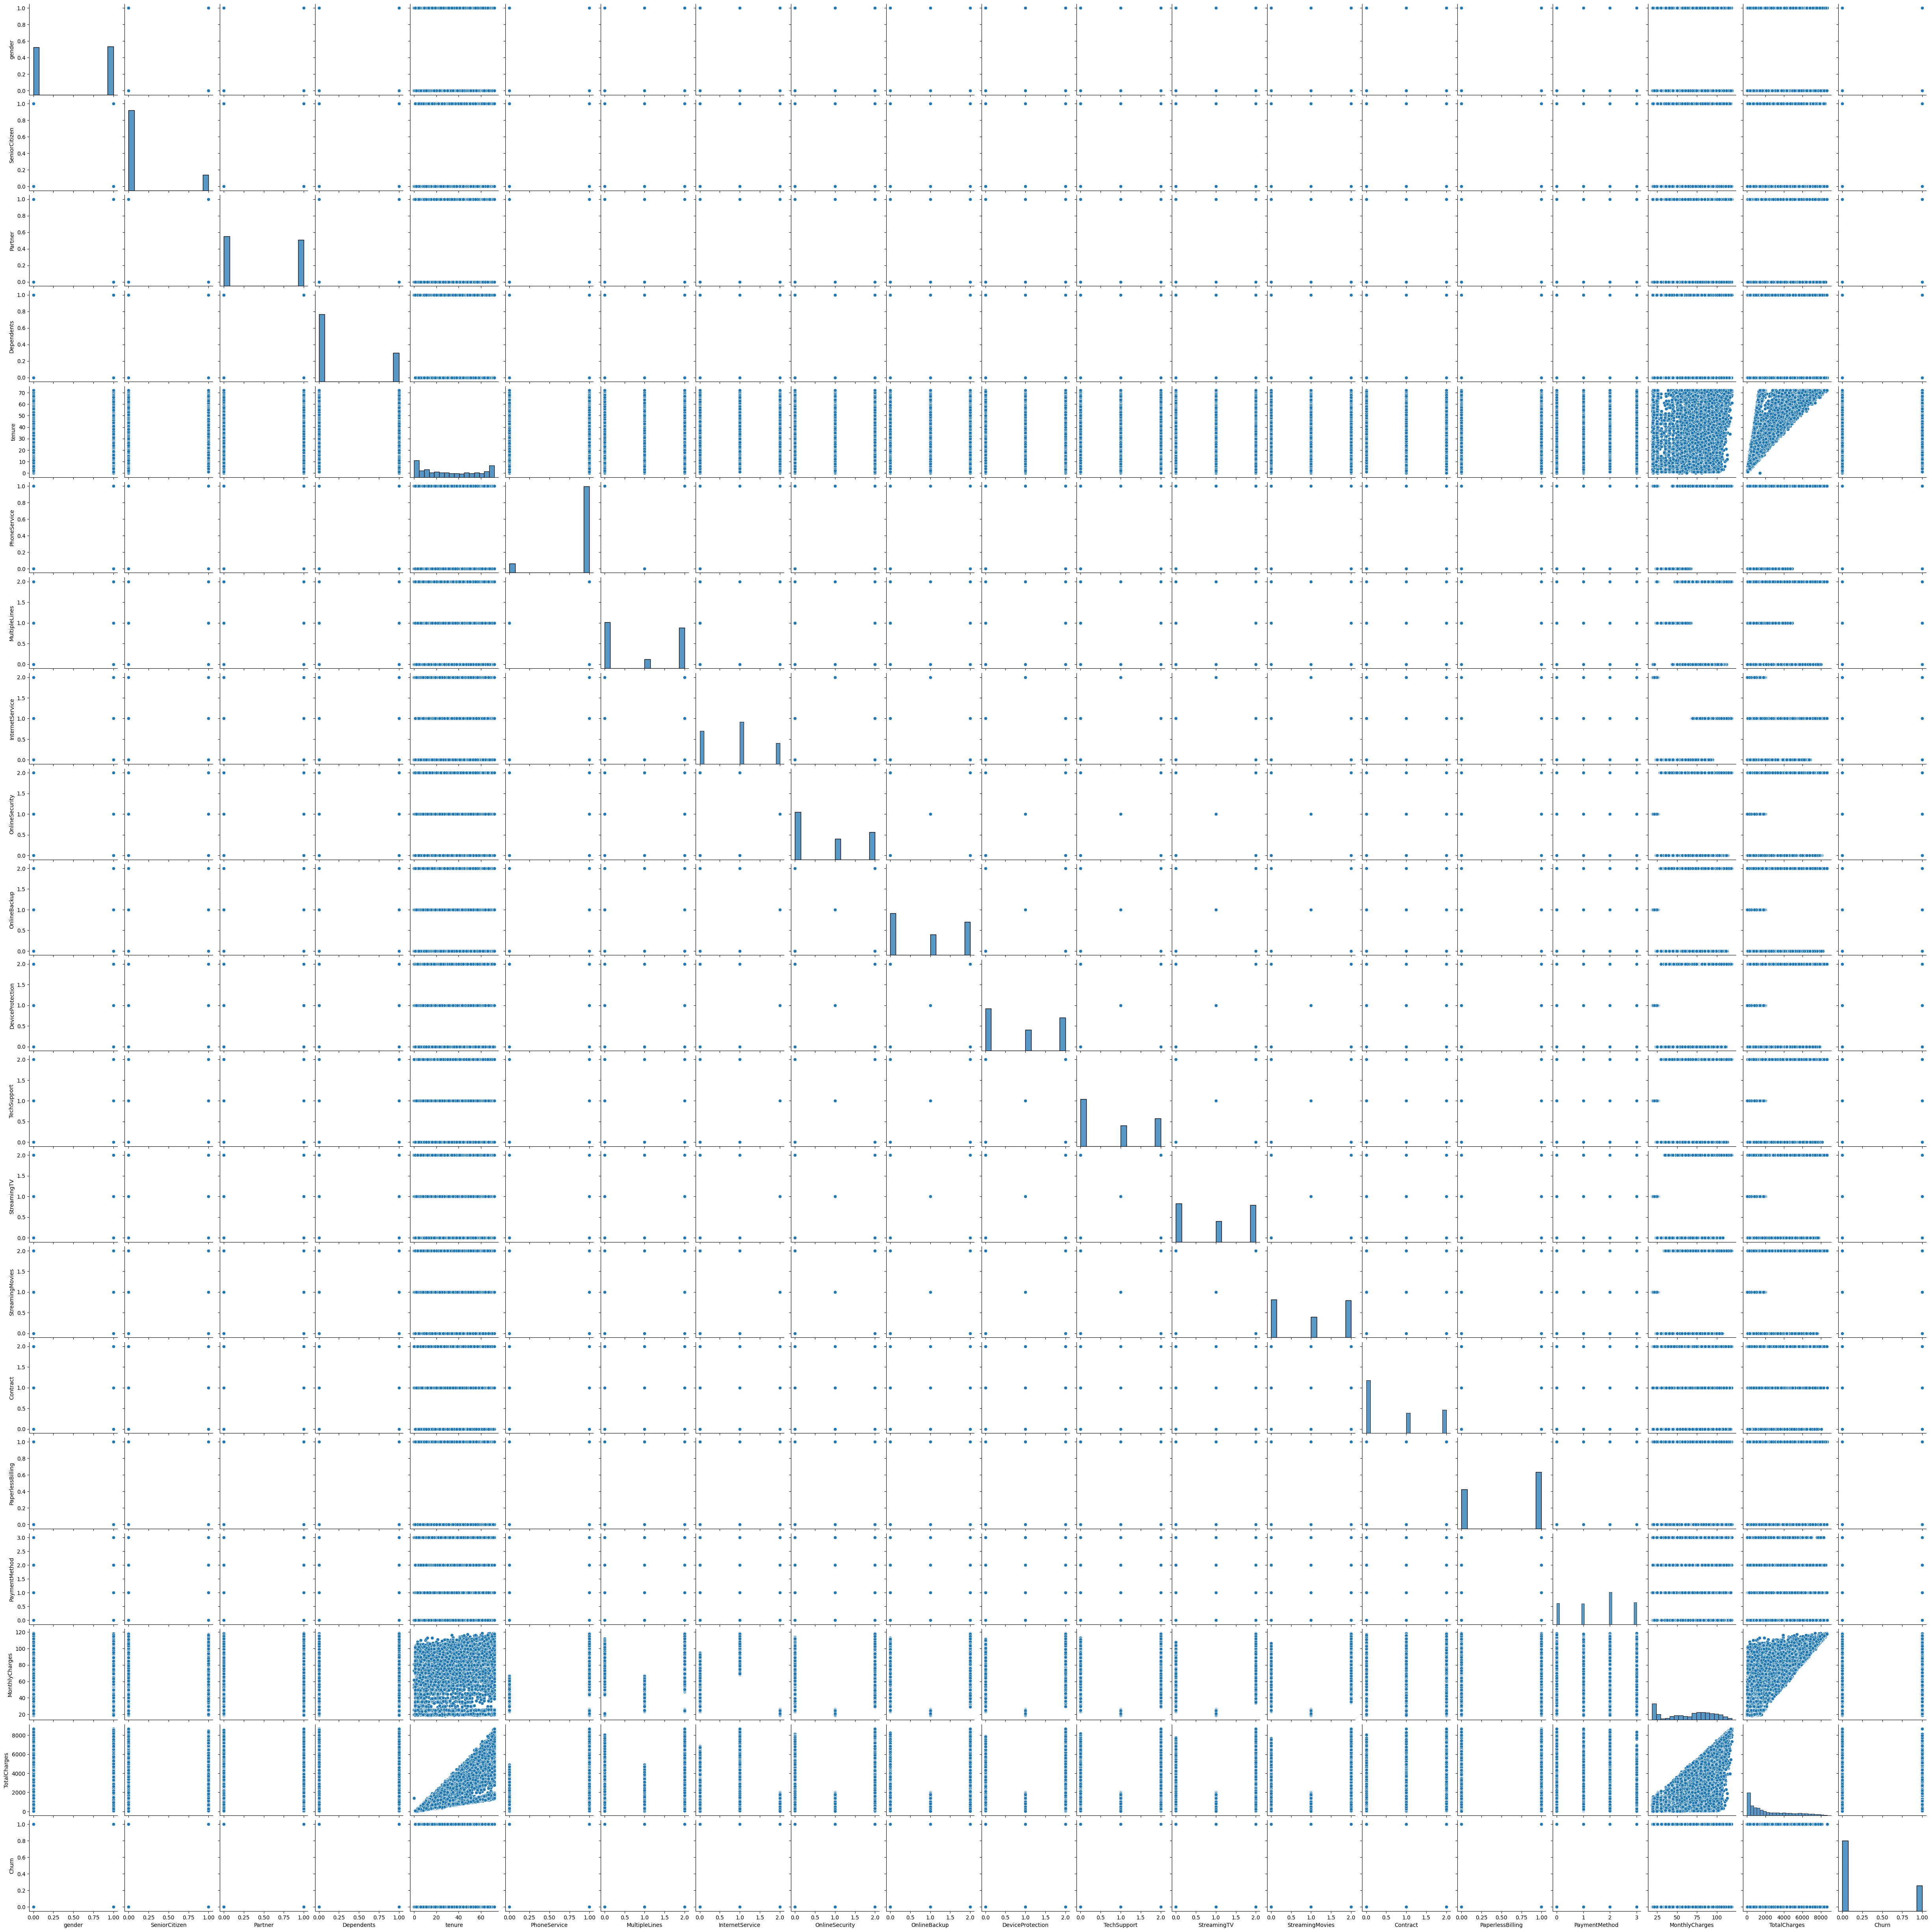

In [ ]:
sns.pairplot(data=data, markers=["^","v"], palette="inferno")

**Splitting data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2, random_state=0)



**Scaling the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train.shape


(8278, 39)

**Model Building**

** Logistic Regression Model**

In [ ]:
def logreg(x_train,x_test,y_train,y_test):
  lr = LogisticRegression(random_state=0)
  lr.fit(x_train,y_train)
  y_lr_tr = lr.predict(x_train)
  print(accuracy_score(y_lr_tr,y_train))
  yPred_lr = lr.predict(x_test)
  print(accuracy_score(yPred_lr,y_test))
  print("***Logistic Regression***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_lr))
  print("Classification Report")
  print(classification_report(y_test,yPred_lr))


Train Accuracy and Test Accuracy

In [ ]:
logreg(x_train,x_test,y_train,y_test)

0.773737617782073
0.7724637681159421
***Logistic Regression***
Confusion_Matrix
[[756 277]
 [194 843]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1033
           1       0.75      0.81      0.78      1037

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



** Decision tree model**


In [ ]:
def decisionTree(x_train,x_test,y_train,y_test):
  dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
  dtc.fit(x_train,y_train)
  y_dt_tr = dtc.predict(x_train)
  print(accuracy_score(y_dt_tr,y_train))
  yPred_dt = dtc.predict(x_test)
  print(accuracy_score(yPred_dt,y_test))
  print("**Decision Tree**")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_dt))
  print("Classification Report")
  print(classification_report(y_test,yPred_dt))


**Train Accuracy and Test Accuracy**

In [ ]:
decisionTree(x_train,x_test,y_train,y_test)

0.9978255617298865
0.5937198067632851
**Decision Tree**
Confusion_Matrix
[[242 791]
 [ 50 987]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.23      0.37      1033
           1       0.56      0.95      0.70      1037

    accuracy                           0.59      2070
   macro avg       0.69      0.59      0.53      2070
weighted avg       0.69      0.59      0.53      2070



** Random forest model**

In [ ]:
def RandomForest(x_train,x_test,y_train,y_test):
  rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
  rf.fit(x_train,y_train)
  y_rf_tr = rf.predict(x_train)
  print(accuracy_score(y_rf_tr,y_train))
  yPred_rf = rf.predict(x_test)
  print(accuracy_score(yPred_rf,y_test))
  print("**Random Forest**")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_rf))
  print("Classification Report")
  print(classification_report(y_test,yPred_rf))



**Train Accuracy and Test Accuracy**

In [ ]:
RandomForest(x_train,x_test,y_train,y_test)



0.9869533703793186
0.782608695652174
**Random Forest**
Confusion_Matrix
[[656 377]
 [ 73 964]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.64      0.74      1033
           1       0.72      0.93      0.81      1037

    accuracy                           0.78      2070
   macro avg       0.81      0.78      0.78      2070
weighted avg       0.81      0.78      0.78      2070



**KNN model**


In [ ]:
def KNN(x_train,x_test,y_train,y_test):
   knn = KNeighborsClassifier()
   knn.fit(x_train,y_train)
   y_knn_tr = knn.predict(x_train)
   print(accuracy_score(y_knn_tr,y_train))
   yPred_knn = knn.predict(x_test)
   print(accuracy_score(yPred_knn,y_test))
   print("**KNN**")
   print("Confusion_Matrix")
   print(confusion_matrix(y_test,yPred_knn))
   print("Classification Report")
   print(classification_report(y_test,yPred_knn))


**Train Accuracy and Test Accuracy**

In [ ]:
KNN(x_train,x_test,y_train,y_test)





0.8562454699202706
0.7864734299516908
**KNN**
Confusion_Matrix
[[721 312]
 [130 907]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1033
           1       0.74      0.87      0.80      1037

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.78      2070
weighted avg       0.80      0.79      0.78      2070



**SVM model**


In [ ]:
def SVM(x_train,x_test,y_train,y_test):
  svm = SVC(kernel = "linear")
  svm.fit(x_train,y_train)
  y_svm_tr = svm.predict(x_train)
  print(accuracy_score(y_svm_tr,y_train))
  yPred_svm = svm.predict(x_test)
  print(accuracy_score(yPred_svm,y_test))
  print("**Support Vector Machine**")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_svm))
  print("Classification Report")
  print(classification_report(y_test,yPred_svm))  



**Train Accuracy and Test Accuracy**

In [ ]:
SVM(x_train,x_test,y_train,y_test)



0.7604493839091568
0.7516908212560387
**Support Vector Machine**
Confusion_Matrix
[[703 330]
 [184 853]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1033
           1       0.72      0.82      0.77      1037

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070



** ANN model**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization




In [ ]:
classifier = Sequential()

classifier.add(Dense(units=30, kernel_initializer = 'normal', activation='relu', input_dim=x.shape[1]))

classifier.add(Dropout(rate = 0.1))
classifier.add(BatchNormalization())

classifier.add(Dense(units=30, kernel_initializer = 'normal', activation='relu'))

classifier.add(Dropout(rate = 0.1))
classifier.add(BatchNormalization())

classifier.add(Dense(units=1, kernel_initializer = 'normal', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
print(x_train)
print(x.shape[0])

[[-0.97619081 -0.32607324  1.17279442 ...  0.76816796  1.39555699
   2.39143317]
 [ 1.10033622 -0.32607324 -0.9118103  ... -1.39559801  0.41868674
   0.45534181]
 [-0.97619081 -0.32607324  1.17279442 ... -1.39559801 -1.54051644
  -0.13265521]
 ...
 [ 1.10033622 -0.32607324 -0.9118103  ...  0.76816796  0.79485375
  -0.4963872 ]
 [-0.76234239 -0.32607324  0.95811413 ...  0.54533535  0.93813894
  -0.22679832]
 [ 1.10033622 -0.32607324 -0.9118103  ... -1.39559801 -1.66764696
  -0.8916799 ]]
7043


**flitting into training set**

In [ ]:
model_history = classifier.fit(x_train, y_train, batch_size=10, validation_split=0.33, validation_data = (x_test, y_test), epochs=200)



Epoch 1/200
828/828 [==============================] - 4s 3ms/step - loss: 0.5131 - accuracy: 0.7568 - val_loss: 0.4750 - val_accuracy: 0.7792
Epoch 2/200
828/828 [==============================] - 2s 3ms/step - loss: 0.4933 - accuracy: 0.7677 - val_loss: 0.4706 - val_accuracy: 0.7715
Epoch 3/200
828/828 [==============================] - 2s 3ms/step - loss: 0.4881 - accuracy: 0.7667 - val_loss: 0.4631 - val_accuracy: 0.7865
Epoch 4/200
828/828 [==============================] - 3s 3ms/step - loss: 0.4878 - accuracy: 0.7661 - val_loss: 0.4520 - val_accuracy: 0.7884
Epoch 5/200
828/828 [==============================] - 2s 3ms/step - loss: 0.4827 - accuracy: 0.7690 - val_loss: 0.4557 - val_accuracy: 0.7826
Epoch 6/200
828/828 [==============================] - 2s 3ms/step - loss: 0.4799 - accuracy: 0.7736 - val_loss: 0.4491 - val_accuracy: 0.7831
Epoch 7/200
828/828 [==============================] - 2s 3ms/step - loss: 0.4801 - accuracy: 0.7722 - val_loss: 0.4539 - val_accuracy: 0.7899

In [ ]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred > 0.5)
ann_pred

65/65 [==============================] - 1s 4ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))



0.8144927536231884
***ANN Model***
Confusion_Matrix
[[801 232]
 [152 885]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.79      0.85      0.82      1037

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



**TESTING THE MODEL**

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("predicting on random input")
lr_pred_own = lr.predict(sc.transform([[0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",lr_pred_own)


predicting on random input
output is:  [0]


In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state=0)
dtc.fit(x_train,y_train)
print("Predicting on random input")
dtc_pred_own = dtc.predict(sc.transform([[0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",dtc_pred_own)



Predicting on random input
output is:  [0]


In [ ]:
rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",rf_pred_own)



Predicting on random input
output is:  [0]


In [ ]:
svc = SVC(kernel = "linear")
svc.fit(x_train,y_train)
print("Predicting on random input")
svm_pred_own = svc.predict(sc.transform([[0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",svm_pred_own)



Predicting on random input
output is:  [0]


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Predicting on random input")
knn_pred_own = knn.predict(sc.transform([[0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print("output is: ",knn_pred_own)



Predicting on random input
output is:  [1]


**for ANN**

In [ ]:

print("Predicting on random input")
ann_pred_own = classifier.predict(sc.transform([[0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,456,1,0,3245,4567]]))
print(ann_pred_own)
ann_pred_own = (ann_pred_own>0.5)
print("output is: ",ann_pred_own)




Predicting on random input
1/1 [==============================] - 0s 50ms/step
[[2.729152e-21]]
output is:  [[False]]


PERFORMING TEST

In [ ]:
def compareModel(X_train,X_test,y_train,y_test):
  logreg(x_train,x_test,y_train,y_test)
  print('-'*100)
  decisionTree(X_train,X_test,y_train,y_test)
  print('-'*100)
  RandomForest(X_train,X_test,y_train,y_test)
  print('-'*100)
  SVM(x_train,x_test,y_train,y_test)
  print('-'*100)
  KNN(X_train,X_test,y_train,y_test)
  print('-'*100)



In [ ]:
compareModel(x_train,x_test,y_train,y_test)



0.773737617782073
0.7724637681159421
***Logistic Regression***
Confusion_Matrix
[[756 277]
 [194 843]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1033
           1       0.75      0.81      0.78      1037

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070

----------------------------------------------------------------------------------------------------
0.9978255617298865
0.5937198067632851
**Decision Tree**
Confusion_Matrix
[[242 791]
 [ 50 987]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.23      0.37      1033
           1       0.56      0.95      0.70      1037

    accuracy                           0.59      2070
   macro avg       0.69      0.59      0.53      2070
weighted avg       0.69      0.59      0.53      2070

--

In [ ]:
print(accuracy_score(ann_pred,y_test))
print("***ANN Model")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))



0.8144927536231884
***ANN Model
Confusion_Matrix
[[801 232]
 [152 885]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.79      0.85      0.82      1037

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



In [ ]:
classifier.save("telcom_churn.h5")